# Good drivers are at the right place at the right time

### 1. Describe good drivers
### 2. Describe right place at the right time 
### 3. Where this is work headed 

## Data: NYC Taxi Data from Taxi and Limousines commision 
- 2013 Data, ~ 2 Gb, fits in RAM
- approximately 14 million rows 

## 1. Describe "good drivers"
### Find drivers who make more dollars per hour 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,10)

In [2]:
import random
import matplotlib.patches as mpatches

In [3]:
from IPython.display import Image, HTML

### Merge data

In [2]:
fares_data_file = '../../trip_fare/trip_fare_2.csv'
trips_data_file = '../../trip_data/trip_data_2.csv'

In [3]:
fares_pd = pd.read_csv(fares_data_file, usecols=[0, 1, 3, 4, 5, 8, 10])
fares_old_columns = fares_pd.columns
fares_pd_columns = [header.strip() for header in fares_old_columns]
fares_pd.columns = fares_pd_columns

print fares_pd_columns
#fares_pd.describe()
#fares_pd.head()

fares_short_pd = fares_pd
fares_short_pd['medallion'] = fares_pd['medallion'].apply(lambda x: x[:8])
fares_short_pd['hack_license'] = fares_pd['hack_license'].apply(lambda x: x[:8])
del fares_pd

fares_short_pd.head()

['medallion', 'hack_license', 'pickup_datetime', 'payment_type', 'fare_amount', 'tip_amount', 'total_amount']


,medallion,hack_license,pickup_datetime,payment_type,fare_amount,tip_amount,total_amount
0,1B5C0970,D9613323,2013-02-08 23:35:14,CRD,6.0,0.0,7.0
1,B42249AE,D4BB308D,2013-02-07 12:20:16,CRD,20.0,3.0,23.5
2,89069922,6318C3AE,2013-02-08 08:56:54,CRD,5.0,1.1,6.6
3,74B7D835,D5E278C9,2013-02-08 09:37:02,CRD,11.0,2.3,13.8
4,4003B847,0B766F10,2013-02-08 19:31:25,CRD,13.0,1.5,16.0


In [4]:
fares_short_pd.to_csv('../data/trip_fare_short_2.csv')
del fares_short_pd

In [5]:
trips_pd = pd.read_csv(trips_data_file, usecols=[1]+range(5, 14))
trips_old_columns = trips_pd.columns
trips_pd_columns = [header.strip() for header in trips_old_columns]
trips_pd.columns = trips_pd_columns

print trips_pd_columns

trips_short_pd = trips_pd
trips_short_pd['hack_license'] = trips_pd['hack_license'].apply(lambda x: x[:8])
del trips_pd

trips_short_pd.head()

['hack_license', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']


,hack_license,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,D9613323,2013-02-08 23:35:14,2013-02-08 23:42:58,1,463,0.8,-73.992439,40.724487,-73.984421,40.718903
1,D4BB308D,2013-02-07 12:20:16,2013-02-07 12:50:27,4,1810,3.1,-73.989494,40.769588,-73.990303,40.737347
2,6318C3AE,2013-02-08 08:56:54,2013-02-08 08:59:43,1,168,1.0,-73.963036,40.799141,-73.972168,40.786446
3,D5E278C9,2013-02-08 09:37:02,2013-02-08 09:50:50,1,828,2.1,-73.987953,40.728764,-74.007118,40.705399
4,0B766F10,2013-02-08 19:31:25,2013-02-08 19:46:23,1,897,3.3,-73.987282,40.743042,-74.010284,40.703964


In [6]:
trips_short_pd.to_csv('../data/trip_data_short_2.csv')
del trips_short_pd

In [7]:
fares_data_file = '../data/trip_fare_short_2.csv'
trips_data_file = '../data/trip_data_short_2.csv'

fares_pd = pd.read_csv(fares_data_file)
trips_pd = pd.read_csv(trips_data_file)

taxi_pd = pd.merge(fares_pd, trips_pd, how='outer')
del fares_pd, trips_pd

taxi_pd.head()

,Unnamed: 0,medallion,hack_license,pickup_datetime,payment_type,fare_amount,tip_amount,total_amount,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,0,1B5C0970,D9613323,2013-02-08 23:35:14,CRD,6.0,0.0,7.0,2013-02-08 23:42:58,1,463,0.8,-73.992439,40.724487,-73.984421,40.718903
1,1,B42249AE,D4BB308D,2013-02-07 12:20:16,CRD,20.0,3.0,23.5,2013-02-07 12:50:27,4,1810,3.1,-73.989494,40.769588,-73.990303,40.737347
2,2,89069922,6318C3AE,2013-02-08 08:56:54,CRD,5.0,1.1,6.6,2013-02-08 08:59:43,1,168,1.0,-73.963036,40.799141,-73.972168,40.786446
3,3,74B7D835,D5E278C9,2013-02-08 09:37:02,CRD,11.0,2.3,13.8,2013-02-08 09:50:50,1,828,2.1,-73.987953,40.728764,-74.007118,40.705399
4,4,4003B847,0B766F10,2013-02-08 19:31:25,CRD,13.0,1.5,16.0,2013-02-08 19:46:23,1,897,3.3,-73.987282,40.743042,-74.010284,40.703964


In [8]:
taxi_pd.to_csv('../data/taxi_short_2.csv')
del taxi_pd

### Cleanup data

In [5]:
taxi_full_pd = pd.read_csv('../data/taxi_short_2.csv')
#taxi_pd.describe()

In [6]:
taxi_full_pd['tip_frac'] = (100.*taxi_full_pd.tip_amount \
                       /(taxi_full_pd.total_amount - taxi_full_pd.tip_amount))
taxi_full_pd['tip_frac'].describe()

count    1.399018e+07
mean     9.916805e+00
std      1.358179e+01
min      0.000000e+00
25%      0.000000e+00
50%      8.695652e+00
75%      1.944444e+01
max      5.333333e+03
Name: tip_frac, dtype: float64

In [7]:
#NYW Lat and Longitude
center_lat = 40.76
center_lng = -73.925
dlat = 0.1
dlng = 0.1
min_lat = center_lat - dlat
max_lat = center_lat + dlat
min_lng = center_lng - dlng
max_lng = center_lng + dlng

In [9]:
taxi_pd = pd.DataFrame(taxi_full_pd[(taxi_full_pd.trip_distance <= 50) & 
                                    (taxi_full_pd.trip_distance > 0.1) &
                                    (taxi_full_pd.trip_time_in_secs > 1) &
                                    (taxi_full_pd.fare_amount < 50) &
                                    (taxi_full_pd.fare_amount*2 % 1 == 0) &
                                    (taxi_full_pd.tip_frac >= 0.1) &
                                    (taxi_full_pd.tip_frac < 50) & 
                                    (taxi_full_pd.pickup_latitude > center_lat - dlat) &
                                    (taxi_full_pd.pickup_latitude < center_lat + dlat) &
                                    (taxi_full_pd.pickup_longitude > center_lng - dlng) &
                                    (taxi_full_pd.pickup_longitude < center_lng + dlng)])

del taxi_full_pd

In [10]:
taxi_pd.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'medallion', u'hack_license',
       u'pickup_datetime', u'payment_type', u'fare_amount', u'tip_amount',
       u'total_amount', u'dropoff_datetime', u'passenger_count',
       u'trip_time_in_secs', u'trip_distance', u'pickup_longitude',
       u'pickup_latitude', u'dropoff_longitude', u'dropoff_latitude',
       u'tip_frac'],
      dtype='object')

In [11]:
taxi_pd.drop(taxi_pd.columns[:2],axis=1,inplace=True)
taxi_pd.head()

,medallion,hack_license,pickup_datetime,payment_type,fare_amount,tip_amount,total_amount,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,tip_frac
1,B42249AE,D4BB308D,2013-02-07 12:20:16,CRD,20.0,3.0,23.5,2013-02-07 12:50:27,4,1810,3.1,-73.989494,40.769588,-73.990303,40.737347,14.634146
2,89069922,6318C3AE,2013-02-08 08:56:54,CRD,5.0,1.1,6.6,2013-02-08 08:59:43,1,168,1.0,-73.963036,40.799141,-73.972168,40.786446,20.000000
3,74B7D835,D5E278C9,2013-02-08 09:37:02,CRD,11.0,2.3,13.8,2013-02-08 09:50:50,1,828,2.1,-73.987953,40.728764,-74.007118,40.705399,20.000000
4,4003B847,0B766F10,2013-02-08 19:31:25,CRD,13.0,1.5,16.0,2013-02-08 19:46:23,1,897,3.3,-73.987282,40.743042,-74.010284,40.703964,10.344828
5,D72DF7B1,AFD828EE,2013-02-08 23:10:01,CRD,26.5,5.5,33.0,2013-02-08 23:46:15,4,2173,7.6,-73.993004,40.720154,-73.959747,40.808540,20.000000


In [12]:
min_date = min(taxi_pd['pickup_datetime'])
max_date = max(taxi_pd['dropoff_datetime'])
num_trips = len(taxi_pd)
num_drivers = len(taxi_pd['hack_license'].unique())
total_miles = taxi_pd['trip_distance'].sum()
total_time = taxi_pd['trip_time_in_secs'].sum()


print 'Using date range {0} to {1}.'.format(min_date, max_date)
print 'Total of {0:,} trips and {1:,} drivers.'.format(num_trips, num_drivers, grouping=True)
print 'Total of {0:,.2f} miles and {1:,.2f} hours.'.format(total_miles, total_time/3600., grouping=True)
# print 'Total of ${0:,.2f} = ${1:,.2f} in fares, ${2:,.2f} in tips, and ${3:,.2f} in tolls/fees.'.format(total_total_amount,
#                                                                                                         total_fare_amount,
#                                                                                                         total_tip_amount,
#                                                                                                         total_fees_amount)

Using date range 2013-02-01 00:00:00 to 2013-03-01 00:44:15.
Total of 7,022,423 trips and 31,686 drivers.
Total of 18,675,394.31 miles and 1,395,874.23 hours.


In [13]:
#scatter plot of pickups (red) and dropoffs(blue)
num_scatter_pts = 200000
scatter_ix = random.sample(range(len(taxi_pd)), num_scatter_pts)
pick_loc_pd = taxi_pd[['pickup_longitude', 'pickup_latitude']]
drop_loc_pd = taxi_pd[['dropoff_longitude', 'dropoff_latitude']]

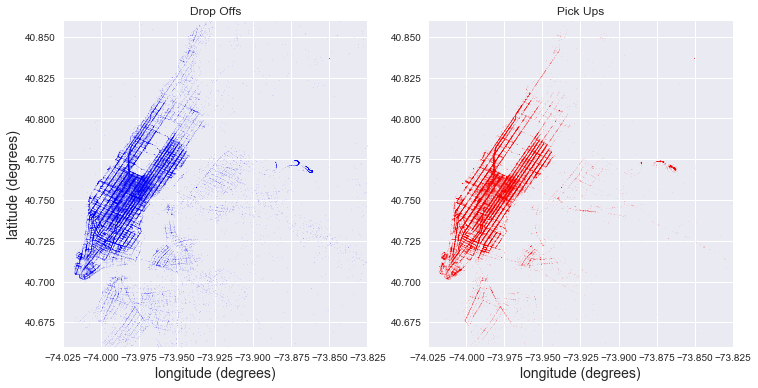

In [14]:
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 14})

plt.subplot(1,2,1)
plt.scatter(drop_loc_pd.ix[scatter_ix,0], drop_loc_pd.ix[scatter_ix,1], 
        s=1, alpha=0.05*num_scatter_pts/100000, c='b', lw=0)
plt.xlim(min_lng, max_lng)
plt.ylim(min_lat, max_lat)
plt.xlabel('longitude (degrees)', size=14)
plt.ylabel('latitude (degrees)', size=14)
plt.title('Drop Offs')

plt.subplot(1,2,2)
plt.scatter(pick_loc_pd.ix[scatter_ix,0], pick_loc_pd.ix[scatter_ix,1], 
        s=1, alpha=0.05*num_scatter_pts/100000, c='r', lw=0)

plt.xlim(min_lng, max_lng)
plt.ylim(min_lat, max_lat)
plt.xlabel('longitude (degrees)', size=14)
#plt.ylabel('latitude (degrees)', size=14)
plt.title('Pick Ups')

#plt.savefig('scatter.png')
plt.show()

### Data into Spatical Zones

In [15]:
num_lat_bins = 40
num_lng_bins = 40

lat_bins = np.linspace(min_lat, max_lat, num_lat_bins+1)
lng_bins = np.linspace(min_lng, max_lng, num_lng_bins+1)

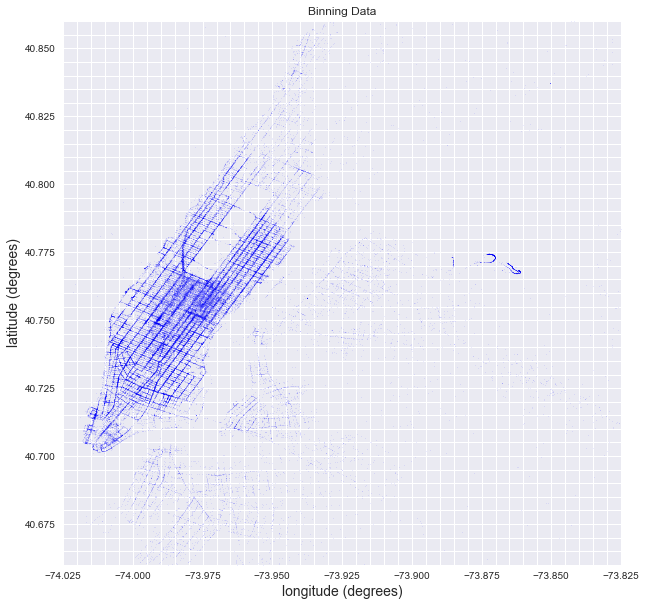

In [16]:
fig, ax = plt.subplots(1)
plt.figure(1,figsize=(8, 8))

plt.subplots
plt.rcParams.update({'font.size': 14})

ax.scatter(drop_loc_pd.ix[scatter_ix,0], drop_loc_pd.ix[scatter_ix,1], 
        s=1, alpha=0.05*num_scatter_pts/100000, c='b', lw=0, label='dropoffs')
plt.xlim(min_lng, max_lng)
plt.ylim(min_lat, max_lat)
ax.set_xticks(lng_bins, minor=True)
ax.set_yticks(lat_bins, minor=True)
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which='minor')
plt.xlabel('longitude (degrees)', size=14)
plt.ylabel('latitude (degrees)', size=14)
plt.title('Binning Data')
#plt.savefig('figures/scatter-zones.png')
plt.show()

In [17]:
#bin stops (pickup or dropoff) in uniform lng/lat bins
lat_lng_mi = pd.MultiIndex.from_product([range(0, num_lat_bins), range(0, num_lng_bins)], names=['lat', 'lng'])

pick_clat = pd.cut(taxi_pd.pickup_latitude.values, lat_bins)
pick_clng = pd.cut(taxi_pd.pickup_longitude.values, lng_bins)
drop_clat = pd.cut(taxi_pd.dropoff_latitude.values, lat_bins)
drop_clng = pd.cut(taxi_pd.dropoff_longitude.values, lng_bins)

print pick_clat
print lat_bins
print pick_clat.codes[:5]
print pick_clat[:5]

[(40.765, 40.77], (40.795, 40.8], (40.725, 40.73], (40.74, 40.745], (40.72, 40.725], ..., (40.775, 40.78], (40.74, 40.745], (40.75, 40.755], (40.75, 40.755], (40.75, 40.755]]
Length: 7022423
Categories (40, object): [(40.66, 40.665] < (40.665, 40.67] < (40.67, 40.675] < (40.675, 40.68] ... (40.84, 40.845] < (40.845, 40.85] < (40.85, 40.855] < (40.855, 40.86]]
[ 40.66   40.665  40.67   40.675  40.68   40.685  40.69   40.695  40.7
  40.705  40.71   40.715  40.72   40.725  40.73   40.735  40.74   40.745
  40.75   40.755  40.76   40.765  40.77   40.775  40.78   40.785  40.79
  40.795  40.8    40.805  40.81   40.815  40.82   40.825  40.83   40.835
  40.84   40.845  40.85   40.855  40.86 ]
[21 27 13 16 12]
[(40.765, 40.77], (40.795, 40.8], (40.725, 40.73], (40.74, 40.745], (40.72, 40.725]]
Categories (40, object): [(40.66, 40.665] < (40.665, 40.67] < (40.67, 40.675] < (40.675, 40.68] ... (40.84, 40.845] < (40.845, 40.85] < (40.85, 40.855] < (40.855, 40.86]]


In [18]:
pick_s = pd.Series(taxi_pd.pickup_longitude)
drop_s = pd.Series(taxi_pd.dropoff_longitude)

#total number of stops (pickup or dropoff) in each lng/lat bin
stop_binned_cnts = pick_s.groupby([pick_clat.codes, pick_clng.codes]).count() + \
                   drop_s.groupby([drop_clat.codes, drop_clng.codes]).count()
stop_binned_cnts_ri = stop_binned_cnts.reindex(lat_lng_mi).fillna(0)

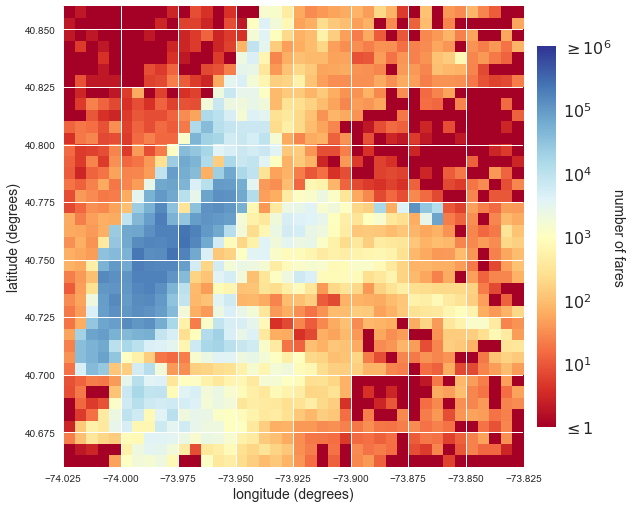

In [19]:
#plot stops in all bins
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 14})
weighted_coord_bins_cnts = np.reshape(stop_binned_cnts_ri.values, (num_lat_bins, num_lng_bins))
extent = [lng_bins[0], lng_bins[-1], lat_bins[0], lat_bins[-1]]
plt.imshow(np.log10(weighted_coord_bins_cnts + 0.1), interpolation='none', origin='lower', 
       extent=extent, vmin=0, vmax=int(0.8*np.log10(2*num_trips))+1, cmap="RdYlBu")
plt.xlabel('longitude (degrees)', size=14)
plt.ylabel('latitude (degrees)', size=14)
cbar = plt.colorbar(shrink=0.7, ticks=range(int(0.8*np.log10(num_trips))+2), pad=0.025)
cbar.set_label('number of fares', rotation=270, labelpad=13, size=14)
cbar.set_ticklabels([r'$\leq1$', r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$\geq10^6$'])
cbar.ax.tick_params(labelsize=16)
plt.savefig('binned_fares.png')
plt.show()

In [20]:
#define zones = top #=num_zones - 1 bins with the most stops
#lump all other stops in other bins (that were previously nonzero) into zone_other
num_zones = 250
zone_cutoff_cnt = np.sort(stop_binned_cnts_ri)[-num_zones]
zone_cnts = stop_binned_cnts_ri[stop_binned_cnts_ri > zone_cutoff_cnt]

zone_zero_cnts = stop_binned_cnts_ri[stop_binned_cnts_ri < 10.]
zone_other_cnts = sum(stop_binned_cnts_ri[stop_binned_cnts_ri <= zone_cutoff_cnt])

zone_cnts_ri = zone_cnts.reindex(lat_lng_mi).fillna(float(zone_other_cnts) / (num_lat_bins*num_lng_bins - num_zones - len(zone_zero_cnts) + 1))
zone_cnts_ri[stop_binned_cnts_ri < 10.] = 0.

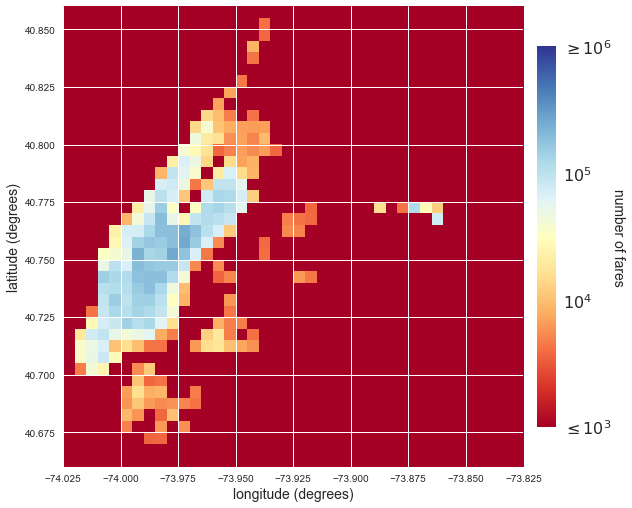

In [21]:
#plot stops in all zones
fig = plt.figure(figsize=(10, 10))
weighted_coord_bins_cnts = np.reshape(zone_cnts_ri.values, (num_lat_bins, num_lng_bins))
extent = [lng_bins[0], lng_bins[-1], lat_bins[0], lat_bins[-1]]
plt.imshow(np.log10(weighted_coord_bins_cnts + 0.1), interpolation='none', origin='lower', 
       extent=extent, vmin=int(np.log10(zone_cutoff_cnt)), vmax=int(0.8*np.log10(2*num_trips))+1, cmap="RdYlBu")
plt.xlabel('longitude (degrees)', size=14)
plt.ylabel('latitude (degrees)', size=14)
cbar = plt.colorbar(shrink=0.7, ticks=range(int(np.log10(zone_cutoff_cnt)), int(0.8*np.log10(num_trips))+2), pad=0.025)
cbar.set_label('number of fares', rotation=270, labelpad=13, size=14)
cbar.set_ticklabels([r'$\leq10^3$', r'$10^4$', r'$10^5$', r'$\geq10^6$'])
cbar.ax.tick_params(labelsize=16)
#plt.savefig('figures/zoned_fares.png')
ax = fig.gca()
ax.grid(True, which='minor')
#plt.grid(True, which='minor')
plt.show()

In [22]:
#pickle numpy matrix of zones
#zone numbers start at 1 in lower left, go L to R then up
#other zone is set to 0
#empty zoned are set to -1
zone_matrix = np.reshape(stop_binned_cnts_ri.values, (num_lat_bins, num_lng_bins))
zone_matrix[zone_matrix == 0] = -1.
zone_matrix[(zone_matrix < zone_cutoff_cnt) * (zone_matrix > 0)] = 0.
zone_matrix = (zone_matrix > 0) * np.reshape(range(1, num_lat_bins*num_lng_bins+1), (num_lat_bins, num_lng_bins))

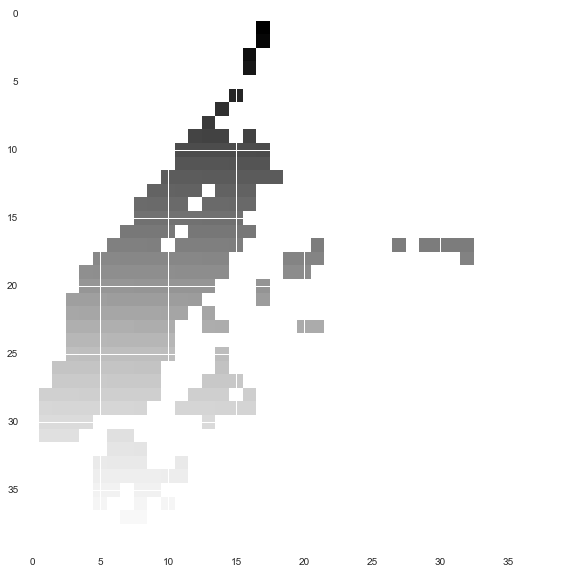

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(pd.DataFrame(zone_matrix[::-1]))
plt.show()

In [24]:
np.savetxt('../data/zone.txt', zone_matrix, delimiter=',')

### Get pickup and dropoff zones columns

In [25]:
lat_lng_mi = pd.MultiIndex.from_product([range(0, num_lat_bins), range(0, num_lng_bins)], names=['lat', 'lng'])
zone_dict = np.append([0],zone_matrix.flatten())

def zone_from_lng_lat(lng, lat, lng_bins, lat_bins):
    num_lng_bins = len(lng_bins) - 1
    num_lat_bins = len(lat_bins) - 1
    
    in_range = (min_lng <= lng) & (lng <= max_lng) & (min_lat <= lat) & (lat <= max_lat)
    return zone_dict[np.vectorize(int)(in_range) * (np.digitize(lng, lng_bins) + (np.digitize(lat, lat_bins) - 1)*num_lng_bins)]


In [26]:
#convert lng/lat to zone
taxi_pd['pickup_zone'] = zone_from_lng_lat(taxi_pd.pickup_longitude, taxi_pd.pickup_latitude, lng_bins, lat_bins)
taxi_pd['dropoff_zone'] = zone_from_lng_lat(taxi_pd.dropoff_longitude, taxi_pd.dropoff_latitude, lng_bins, lat_bins)

In [27]:
taxi_pd.head()

,medallion,hack_license,pickup_datetime,payment_type,fare_amount,tip_amount,total_amount,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,tip_frac,pickup_zone,dropoff_zone
1,B42249AE,D4BB308D,2013-02-07 12:20:16,CRD,20.0,3.0,23.5,2013-02-07 12:50:27,4,1810,3.1,-73.989494,40.769588,-73.990303,40.737347,14.634146,848,607
2,89069922,6318C3AE,2013-02-08 08:56:54,CRD,5.0,1.1,6.6,2013-02-08 08:59:43,1,168,1.0,-73.963036,40.799141,-73.972168,40.786446,20.000000,1093,1011
3,74B7D835,D5E278C9,2013-02-08 09:37:02,CRD,11.0,2.3,13.8,2013-02-08 09:50:50,1,828,2.1,-73.987953,40.728764,-74.007118,40.705399,20.000000,528,364
4,4003B847,0B766F10,2013-02-08 19:31:25,CRD,13.0,1.5,16.0,2013-02-08 19:46:23,1,897,3.3,-73.987282,40.743042,-74.010284,40.703964,10.344828,648,323
5,D72DF7B1,AFD828EE,2013-02-08 23:10:01,CRD,26.5,5.5,33.0,2013-02-08 23:46:15,4,2173,7.6,-73.993004,40.720154,-73.959747,40.808540,20.000000,487,1174


In [62]:
#taxi_pd.to_csv('../data/taxi_short_zoned_2.csv')

### Process data for learning 
[comment]: <> (This is a comment, it will not be included)
[comment]: <> ([sc](https://giphy.com/gifs/git-merge-cFkiFMDg3iFoI/download))
[comment]: <> (<img src="files/giphy.gif">)
<img src="https://media.giphy.com/media/cFkiFMDg3iFoI/giphy.gif">


### Find distance traveled from previous dropoff 
### Find euclidean distance between zones

In [28]:
delta_lat = lat_bins[1] - lat_bins[0]
delta_lng = lng_bins[1] - lng_bins[0]

radius_earth_miles = 3963.17
delta_lat_miles = np.deg2rad(delta_lat) * radius_earth_miles
delta_lng_miles = np.deg2rad(delta_lng) * radius_earth_miles

In [29]:
def zone_dist_sq(zone1, zone2):
    #calculate zone-to-zone distance using data
    return taxi_pd[(taxi_pd.pickup_zone == zone1) & (taxi_pd.dropoff_zone == zone2)].trip_distance.mean()**2

def zone_euclid_dist_sq(zone1, zone2):
    if (zone1 == 0) or (zone2 == 0):
        #use data for trips to/from "other" zone
        return zone_dist_sq(zone1, zone2)
    else:
        #otherwise use euclidean distance
        zone1_lat_bin = np.floor(zone1 / num_lng_bins) + 1
        zone1_lng_bin = zone1 % num_lng_bins
        zone2_lat_bin = np.floor(zone2 / num_lng_bins) + 1
        zone2_lng_bin = zone2 % num_lng_bins

        lat_miles = (zone2_lat_bin - zone1_lat_bin) * delta_lat_miles
        lng_miles = (zone2_lng_bin - zone1_lng_bin) * delta_lat_miles
    
    return np.around(lat_miles**2 + lng_miles**2, decimals=2)

In [30]:
zones = np.unique(zone_matrix)
num_zones = len(zones)
print "Length of zones", num_zones

euclid_dist_array = np.around(np.sqrt(np.array([zone_euclid_dist_sq(zone1, zone2) for zone1 in zones for zone2 in zones])), 2)
euclid_dist_matrix = np.around(np.sqrt(np.array([[zone_euclid_dist_sq(zone1, zone2) for zone1 in zones] for zone2 in zones])), 2)

pick_zone_i = [zone1 for zone1 in zones for zone2 in zones]
drop_zone_i = [zone2 for zone1 in zones for zone2 in zones]

Length of zones 251


In [31]:
euclid_dist_matrix_pd = pd.DataFrame(np.array([pick_zone_i, drop_zone_i, euclid_dist_array]).T, columns=['pickup_zone', 
                                                                                                      'dropoff_zone', 
                                                                                                      'euclid_distance'])

In [32]:
euclid_dist_matrix_pd.head()

,pickup_zone,dropoff_zone,euclid_distance
0,0.0,0.0,3.31
1,0.0,88.0,3.49
2,0.0,89.0,2.67
3,0.0,126.0,3.00
4,0.0,129.0,2.89


In [33]:
euclid_dist_matrix_pd.to_pickle('../data/euclid_distance_251x251_pd_new.pkl')

In [34]:
taxi_pd.drop_duplicates(keep = 'first')
taxi_pd = taxi_pd.sort_values(['hack_license','pickup_datetime'])
taxi_pd.head() 

,medallion,hack_license,pickup_datetime,payment_type,fare_amount,tip_amount,total_amount,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,tip_frac,pickup_zone,dropoff_zone
13073686,BE530E79,0002555B,2013-02-01 00:07:13,CRD,28.0,3.5,37.3,2013-02-01 00:28:46,1,1293,9.1,-73.872993,40.774044,-73.994263,40.759243,10.355030,911,767
13090348,BE530E79,0002555B,2013-02-01 00:34:29,CRD,24.0,2.5,27.5,2013-02-01 01:02:02,1,1652,6.7,-73.989601,40.762184,-73.964287,40.719067,10.000000,808,453
13192216,BE530E79,0002555B,2013-02-01 18:18:54,CRD,32.5,9.7,48.5,2013-02-01 18:53:29,1,2074,9.2,-73.885262,40.773018,-74.001083,40.736820,25.000000,908,605
13212524,BE530E79,0002555B,2013-02-01 18:55:12,CRD,11.5,2.6,15.6,2013-02-01 19:10:55,2,943,1.4,-74.001274,40.736412,-74.008301,40.716595,20.000000,605,444
13183784,BE530E79,0002555B,2013-02-01 19:12:16,CRD,10.0,1.5,13.0,2013-02-01 19:24:31,1,734,1.8,-74.008575,40.716484,-73.996277,40.737926,13.043478,444,606


In [35]:
taxi_pd.pickup_datetime = pd.to_datetime(taxi_pd.pickup_datetime)
taxi_pd.dropoff_datetime = pd.to_datetime(taxi_pd.dropoff_datetime)

#find previous dropoff zone and time elapsed
taxi_pd['prev_dropoff_zone'] = taxi_pd.groupby('hack_license').dropoff_zone.shift().values
taxi_pd['time_since_prev_fare'] = (taxi_pd.pickup_datetime - \
                                   taxi_pd.groupby('hack_license').dropoff_datetime.shift().values).astype('timedelta64[s]')

In [36]:
#if time since previous fare is greater than 6 hours, assume new shift and drop
taxi_pd = taxi_pd[taxi_pd.time_since_prev_fare <= 6*3600]

In [37]:
taxi_pd['day_of_week'] = taxi_pd.pickup_datetime.apply(lambda x: x.dayofweek)
taxi_pd['pickup_hour'] = taxi_pd.pickup_datetime.apply(lambda x: x.hour)
#taxi_pd['pickup_minute'] = taxi_pd.pickup_datetime.apply(lambda x: x.hour*60 + x.minute)

#taxi_pd.head()

In [39]:
taxi_pd = taxi_pd.groupby('hack_license').filter(lambda x: len(x) > 300)

In [40]:
taxi_pd.columns

Index([u'medallion', u'hack_license', u'pickup_datetime', u'payment_type',
       u'fare_amount', u'tip_amount', u'total_amount', u'dropoff_datetime',
       u'passenger_count', u'trip_time_in_secs', u'trip_distance',
       u'pickup_longitude', u'pickup_latitude', u'dropoff_longitude',
       u'dropoff_latitude', u'tip_frac', u'pickup_zone', u'dropoff_zone',
       u'prev_dropoff_zone', u'time_since_prev_fare', u'day_of_week',
       u'pickup_hour'],
      dtype='object')

In [41]:
taxi_pd.drop(['medallion', 'payment_type', ], axis=1, inplace=True)

In [42]:
taxi_pd[['dropoff_zone', 'prev_dropoff_zone']].iloc[:5]

,dropoff_zone,prev_dropoff_zone
13099317,566,0.0
13219882,570,687.0
13203318,810,570.0
13190056,0,810.0
13189027,488,0.0


In [43]:
taxi_pd.prev_dropoff_zone = taxi_pd.prev_dropoff_zone.astype(int)

In [46]:
taxi_pd.to_csv('../data/taxi_beforeMerge_2.csv')

In [4]:
taxi_pd = pd.read_csv('../data/taxi_beforeMerge_2.csv')
taxi_pd.head()

,Unnamed: 0,hack_license,pickup_datetime,fare_amount,tip_amount,total_amount,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,tip_frac,pickup_zone,dropoff_zone,prev_dropoff_zone,time_since_prev_fare,day_of_week,pickup_hour
0,13099317,00360896,2013-02-01 02:38:06,5.0,1.8,7.8,2013-02-01 02:40:45,1,158,0.8,...,40.742111,-73.997665,40.733513,30.000000,647,566,0,2311.0,4,2
1,13219882,00360896,2013-02-01 18:16:35,13.0,1.0,15.5,2013-02-01 18:33:39,1,1023,2.4,...,40.749664,-73.979965,40.732517,6.896552,687,570,687,54.0,4,18
2,13203318,00360896,2013-02-01 18:57:41,4.5,1.2,7.2,2013-02-01 19:00:51,1,189,0.8,...,40.761417,-73.975021,40.763752,20.000000,808,810,570,1442.0,4,18
3,13190056,00360896,2013-02-01 19:19:55,30.0,6.5,38.0,2013-02-01 20:00:50,1,2454,6.6,...,40.769581,-73.972214,40.693241,20.634921,848,0,810,1144.0,4,19
4,13189027,00360896,2013-02-01 20:18:38,7.5,1.7,10.2,2013-02-01 20:28:37,1,599,0.5,...,40.726955,-73.989426,40.721336,20.000000,527,488,0,1068.0,4,20


In [5]:
#del euclid_dist_matrix_pd 
euclid_dist_matrix_pd = pd.read_pickle('../data/euclid_distance_251x251_pd_new.pkl')
euclid_dist_matrix_pd.head()

,pickup_zone,dropoff_zone,euclid_distance
0,0.0,0.0,3.31
1,0.0,88.0,3.49
2,0.0,89.0,2.67
3,0.0,126.0,3.00
4,0.0,129.0,2.89


In [6]:
print euclid_dist_matrix_pd.columns

Index([u'pickup_zone', u'dropoff_zone', u'euclid_distance'], dtype='object')


In [7]:
euclid_dist_matrix_pd.pickup_zone = euclid_dist_matrix_pd.pickup_zone.astype(int)
euclid_dist_matrix_pd.dropoff_zone = euclid_dist_matrix_pd.dropoff_zone.astype(int)
euclid_dist_matrix_pd.head()

,pickup_zone,dropoff_zone,euclid_distance
0,0,0,3.31
1,0,88,3.49
2,0,89,2.67
3,0,126,3.00
4,0,129,2.89


In [8]:
taxi_pd['pickDrop'] = zip(taxi_pd.dropoff_zone, taxi_pd.prev_dropoff_zone)

In [9]:
euclid_dist_matrix_pd['pickDrop'] = zip(euclid_dist_matrix_pd.pickup_zone, 
                                        euclid_dist_matrix_pd.dropoff_zone)
euclid_dist_matrix_pd.head()                              

,pickup_zone,dropoff_zone,euclid_distance,pickDrop
0,0,0,3.31,"(0, 0)"
1,0,88,3.49,"(0, 88)"
2,0,89,2.67,"(0, 89)"
3,0,126,3.00,"(0, 126)"
4,0,129,2.89,"(0, 129)"


In [15]:
print taxi_pd.columns
print euclid_dist_matrix_pd.columns
print euclid_dist_matrix_pd.euclid_distance.values[:5]
print euclid_dist_matrix_pd.pickDrop.values[:5]

Index([u'Unnamed: 0', u'hack_license', u'pickup_datetime', u'fare_amount',
       u'tip_amount', u'total_amount', u'dropoff_datetime', u'passenger_count',
       u'trip_time_in_secs', u'trip_distance', u'pickup_longitude',
       u'pickup_latitude', u'dropoff_longitude', u'dropoff_latitude',
       u'tip_frac', u'pickup_zone', u'dropoff_zone', u'prev_dropoff_zone',
       u'time_since_prev_fare', u'day_of_week', u'pickup_hour', u'pickDrop'],
      dtype='object')
Index([u'pickup_zone', u'dropoff_zone', u'euclid_distance', u'pickDrop'], dtype='object')
[ 3.31  3.49  2.67  3.    2.89]
[(0, 0) (0, 88) (0, 89) (0, 126) (0, 129)]


In [21]:
euclid_dist_matrix_pd.loc[:5,['euclid_distance', 'pickDrop']]

,euclid_distance,pickDrop
0,3.31,"(0, 0)"
1,3.49,"(0, 88)"
2,2.67,"(0, 89)"
3,3.00,"(0, 126)"
4,2.89,"(0, 129)"
5,3.14,"(0, 131)"


In [22]:
taxi_pd = pd.merge(taxi_pd, euclid_dist_matrix_pd.loc[:,['euclid_distance', 'pickDrop']], how='left',
                   left_on = 'pickDrop', right_on = 'pickDrop')
taxi_pd.head()

,Unnamed: 0,hack_license,pickup_datetime,fare_amount,tip_amount,total_amount,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,dropoff_latitude,tip_frac,pickup_zone,dropoff_zone,prev_dropoff_zone,time_since_prev_fare,day_of_week,pickup_hour,pickDrop,euclid_distance
0,13099317,00360896,2013-02-01 02:38:06,5.0,1.8,7.8,2013-02-01 02:40:45,1,158,0.8,...,40.733513,30.000000,647,566,0,2311.0,4,2,"(566, 0)",6.80
1,13219882,00360896,2013-02-01 18:16:35,13.0,1.0,15.5,2013-02-01 18:33:39,1,1023,2.4,...,40.732517,6.896552,687,570,687,54.0,4,18,"(570, 687)",1.47
2,13203318,00360896,2013-02-01 18:57:41,4.5,1.2,7.2,2013-02-01 19:00:51,1,189,0.8,...,40.763752,20.000000,808,810,570,1442.0,4,18,"(810, 570)",2.08
3,13190056,00360896,2013-02-01 19:19:55,30.0,6.5,38.0,2013-02-01 20:00:50,1,2454,6.6,...,40.693241,20.634921,848,0,810,1144.0,4,19,"(0, 810)",4.86
4,13189027,00360896,2013-02-01 20:18:38,7.5,1.7,10.2,2013-02-01 20:28:37,1,599,0.5,...,40.721336,20.000000,527,488,0,1068.0,4,20,"(488, 0)",6.02


In [23]:
taxi_pd.columns

Index([u'Unnamed: 0', u'hack_license', u'pickup_datetime', u'fare_amount',
       u'tip_amount', u'total_amount', u'dropoff_datetime', u'passenger_count',
       u'trip_time_in_secs', u'trip_distance', u'pickup_longitude',
       u'pickup_latitude', u'dropoff_longitude', u'dropoff_latitude',
       u'tip_frac', u'pickup_zone', u'dropoff_zone', u'prev_dropoff_zone',
       u'time_since_prev_fare', u'day_of_week', u'pickup_hour', u'pickDrop',
       u'euclid_distance'],
      dtype='object')

In [ ]:
taxi_pd.drop(['Unnamed: 0','pickup_datetime','dropoff_datetime', 
              'pickup_longitude', 'pickup_latitude', 
              'dropoff_longitude', 'dropoff_latitude', 'prev_dropoff_zone'],axis=1,inplace=True)

In [27]:
taxi_pd.head()

,hack_license,fare_amount,tip_amount,total_amount,passenger_count,trip_time_in_secs,trip_distance,tip_frac,pickup_zone,dropoff_zone,time_since_prev_fare,day_of_week,pickup_hour,pickDrop,euclid_distance
0,00360896,5.0,1.8,7.8,1,158,0.8,30.000000,647,566,2311.0,4,2,"(566, 0)",6.80
1,00360896,13.0,1.0,15.5,1,1023,2.4,6.896552,687,570,54.0,4,18,"(570, 687)",1.47
2,00360896,4.5,1.2,7.2,1,189,0.8,20.000000,808,810,1442.0,4,18,"(810, 570)",2.08
3,00360896,30.0,6.5,38.0,1,2454,6.6,20.634921,848,0,1144.0,4,19,"(0, 810)",4.86
4,00360896,7.5,1.7,10.2,1,599,0.5,20.000000,527,488,1068.0,4,20,"(488, 0)",6.02


In [26]:
taxi_pd.to_csv('../data/taxi_short_zoned_minuted_2.csv')

### Calculate Performance Measures

In [28]:
#calculate some performance stats for each driver
perf_pd = pd.DataFrame([])
perf_pd['hack_license'] = taxi_pd.hack_license.unique()
perf_pd['total_time_on_shift'] = taxi_pd.groupby('hack_license').trip_time_in_secs.sum().values + \
                                 taxi_pd.groupby('hack_license').time_since_prev_fare.sum().values
perf_pd['total_dist_on_shift'] = taxi_pd.groupby('hack_license').trip_distance.sum().values + \
                                 taxi_pd.groupby('hack_license').euclid_distance.sum().values
perf_pd['avg_speed_mph'] = perf_pd.total_dist_on_shift / (perf_pd.total_time_on_shift / 3600.)
perf_pd['total_fare'] = taxi_pd.groupby('hack_license').fare_amount.sum().values
perf_pd['total_tip'] = taxi_pd.groupby('hack_license').tip_amount.sum().values
perf_pd['total_total'] = taxi_pd.groupby('hack_license').total_amount.sum().values
perf_pd['fare_per_hour'] = perf_pd.total_fare / (perf_pd.total_time_on_shift / 3600.)
perf_pd['tip_per_hour'] = perf_pd.total_tip / (perf_pd.total_time_on_shift / 3600.)
perf_pd['dollars_per_hour'] = perf_pd.fare_per_hour + perf_pd.tip_per_hour
perf_pd['dollars_per_mile'] = (perf_pd.total_fare + perf_pd.total_tip) / perf_pd.total_dist_on_shift

miles_per_gallon = 15.
dollars_per_gallon = 2.5
dollars_per_mile = dollars_per_gallon / miles_per_gallon

perf_pd['net_dollars_per_hour'] = perf_pd.dollars_per_hour - dollars_per_mile*perf_pd.avg_speed_mph

### Label drivers based on performance

In [29]:
net_dollars_per_hour_bot = np.percentile(perf_pd.net_dollars_per_hour, 5)
net_dollars_per_hour_top = np.percentile(perf_pd.net_dollars_per_hour, 95)

def performance(net_dollars_per_hour):
    return 1 * (net_dollars_per_hour >= net_dollars_per_hour_top) + \
          -1 * (net_dollars_per_hour <= net_dollars_per_hour_bot)

perf_pd['performance'] = perf_pd.net_dollars_per_hour.apply(performance)

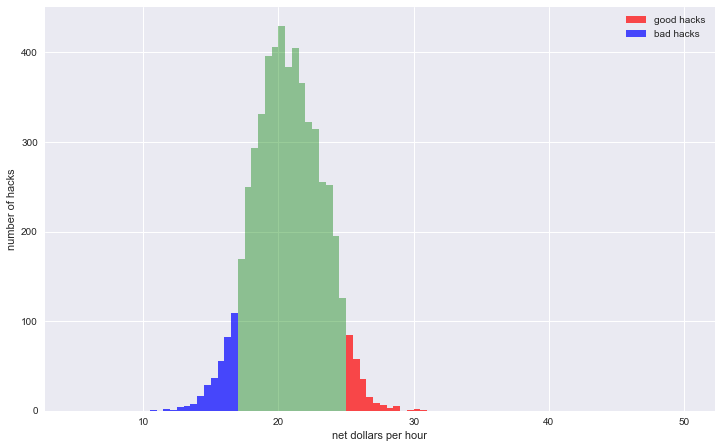

In [33]:
plt.figure(figsize=(1.5*8, 1.5*4.95))
plt.rcParams.update({'font.size': 24})
plt.hist(perf_pd.net_dollars_per_hour, 
         range=(np.around(net_dollars_per_hour_bot),np.around(net_dollars_per_hour_top)), 
     bins=2*(np.around(net_dollars_per_hour_top)-np.around(net_dollars_per_hour_bot)), alpha=0.4, color='g')
plt.hist(perf_pd.net_dollars_per_hour, range=(np.around(net_dollars_per_hour_top),50),
     bins=2*(50 - np.around(net_dollars_per_hour_top)), alpha=0.7, label='good hacks', color='r')
plt.hist(perf_pd.net_dollars_per_hour, range=(5,np.around(net_dollars_per_hour_bot)),
     bins=2*(np.around(net_dollars_per_hour_bot) - 5), alpha=0.7, label='bad hacks', color='b')
plt.legend(frameon=False)
plt.xlabel('net dollars per hour')
plt.ylabel('number of hacks')
# savefig('figures/hack_performance.png')
plt.show()

In [34]:
perf_pd.head()

,hack_license,total_time_on_shift,total_dist_on_shift,avg_speed_mph,total_fare,total_tip,total_total,fare_per_hour,tip_per_hour,dollars_per_hour,dollars_per_mile,net_dollars_per_hour,performance
0,00360896,739978.0,1842.56,8.964072,3683.5,764.45,4787.15,17.920262,3.719057,21.639319,2.414006,20.145307,0
1,005195D2,837446.0,1879.25,8.078491,3739.5,741.72,4826.62,16.075305,3.188495,19.263800,2.384579,17.917385,0
2,006FAD57,733260.0,1773.76,8.708420,3780.0,763.80,4959.80,18.558219,3.749939,22.308158,2.561677,20.856755,0
3,00711D0C,570240.0,1795.82,11.337247,3675.0,713.11,4747.36,23.200758,4.501957,27.702715,2.443513,25.813173,1
4,00759C8E,852720.0,1498.54,6.326513,3594.0,692.15,4503.95,15.173093,2.922108,18.095201,2.860217,17.040782,0


In [35]:
#make dataframe of hack vs. performance tag
hack_perf_pd = pd.DataFrame([])
hack_perf_pd['hack_license'] = perf_pd.hack_license
hack_perf_pd['performance'] = perf_pd.performance
hack_perf_pd.head()

,hack_license,performance
0,00360896,0
1,005195D2,0
2,006FAD57,0
3,00711D0C,1
4,00759C8E,0


### Bin Time Information

In [37]:
taxi_pd['day_of_week_binned'] = 1 + (taxi_pd.day_of_week.values >= 4)
taxi_pd['pickup_hour_binned'] = np.floor(taxi_pd.pickup_hour.values / 2).astype(int)
taxi_pd['pickup_day_hour_binned'] = zip(taxi_pd.day_of_week_binned, taxi_pd.pickup_hour_binned)
taxi_pd['pickup_zone_time'] = zip(taxi_pd.pickup_zone, taxi_pd.pickup_day_hour_binned)

In [39]:
taxi_pd.head()

,hack_license,fare_amount,tip_amount,total_amount,passenger_count,trip_time_in_secs,trip_distance,tip_frac,pickup_zone,dropoff_zone,time_since_prev_fare,day_of_week,pickup_hour,pickDrop,euclid_distance,day_of_week_binned,pickup_hour_binned,pickup_day_hour_binned,pickup_zone_time
0,00360896,5.0,1.8,7.8,1,158,0.8,30.000000,647,566,2311.0,4,2,"(566, 0)",6.80,2,1,"(2, 1)","(647, (2, 1))"
1,00360896,13.0,1.0,15.5,1,1023,2.4,6.896552,687,570,54.0,4,18,"(570, 687)",1.47,2,9,"(2, 9)","(687, (2, 9))"
2,00360896,4.5,1.2,7.2,1,189,0.8,20.000000,808,810,1442.0,4,18,"(810, 570)",2.08,2,9,"(2, 9)","(808, (2, 9))"
3,00360896,30.0,6.5,38.0,1,2454,6.6,20.634921,848,0,1144.0,4,19,"(0, 810)",4.86,2,9,"(2, 9)","(848, (2, 9))"
4,00360896,7.5,1.7,10.2,1,599,0.5,20.000000,527,488,1068.0,4,20,"(488, 0)",6.02,2,10,"(2, 10)","(527, (2, 10))"


In [38]:
pickup_zonetimes_pd = pd.DataFrame([])
pickup_zonetimes_pd['pickup_zone_time'] = np.sort(taxi_pd.pickup_zone_time.unique())
pickup_zonetimes_pd['pickup_zone_time_renamed'] = range(len(pickup_zonetimes_pd))

pickup_zonetimes_pd.head()

,pickup_zone_time,pickup_zone_time_renamed
0,"(0, (1, 0))",0
1,"(0, (1, 1))",1
2,"(0, (1, 2))",2
3,"(0, (1, 3))",3
4,"(0, (1, 4))",4


In [ ]:
taxi_pd = pd.merge(taxi_pd, pickup_zonetimes_pd, how='left',
                            left_on='pickup_zone_time', right_on = 'pickup_zone_time')
#taxi_pd = taxi_pd.drop('pickup_zone_time', axis=1)

In [41]:
taxi_pd.head()

,hack_license,fare_amount,tip_amount,total_amount,passenger_count,trip_time_in_secs,trip_distance,tip_frac,pickup_zone,dropoff_zone,time_since_prev_fare,day_of_week,pickup_hour,pickDrop,euclid_distance,day_of_week_binned,pickup_hour_binned,pickup_day_hour_binned,pickup_zone_time,pickup_zone_time_renamed
0,00360896,5.0,1.8,7.8,1,158,0.8,30.000000,647,566,2311.0,4,2,"(566, 0)",6.80,2,1,"(2, 1)","(647, (2, 1))",2396
1,00360896,13.0,1.0,15.5,1,1023,2.4,6.896552,687,570,54.0,4,18,"(570, 687)",1.47,2,9,"(2, 9)","(687, (2, 9))",2688
2,00360896,4.5,1.2,7.2,1,189,0.8,20.000000,808,810,1442.0,4,18,"(810, 570)",2.08,2,9,"(2, 9)","(808, (2, 9))",3452
3,00360896,30.0,6.5,38.0,1,2454,6.6,20.634921,848,0,1144.0,4,19,"(0, 810)",4.86,2,9,"(2, 9)","(848, (2, 9))",3739
4,00360896,7.5,1.7,10.2,1,599,0.5,20.000000,527,488,1068.0,4,20,"(488, 0)",6.02,2,10,"(2, 10)","(527, (2, 10))",1810


In [42]:
taxi_pd = pd.merge(taxi_pd, hack_perf_pd, how='left',
                            left_on='hack_license', right_on = 'hack_license')
taxi_pd.head()

,hack_license,fare_amount,tip_amount,total_amount,passenger_count,trip_time_in_secs,trip_distance,tip_frac,pickup_zone,dropoff_zone,...,day_of_week,pickup_hour,pickDrop,euclid_distance,day_of_week_binned,pickup_hour_binned,pickup_day_hour_binned,pickup_zone_time,pickup_zone_time_renamed,performance
0,00360896,5.0,1.8,7.8,1,158,0.8,30.000000,647,566,...,4,2,"(566, 0)",6.80,2,1,"(2, 1)","(647, (2, 1))",2396,0
1,00360896,13.0,1.0,15.5,1,1023,2.4,6.896552,687,570,...,4,18,"(570, 687)",1.47,2,9,"(2, 9)","(687, (2, 9))",2688,0
2,00360896,4.5,1.2,7.2,1,189,0.8,20.000000,808,810,...,4,18,"(810, 570)",2.08,2,9,"(2, 9)","(808, (2, 9))",3452,0
3,00360896,30.0,6.5,38.0,1,2454,6.6,20.634921,848,0,...,4,19,"(0, 810)",4.86,2,9,"(2, 9)","(848, (2, 9))",3739,0
4,00360896,7.5,1.7,10.2,1,599,0.5,20.000000,527,488,...,4,20,"(488, 0)",6.02,2,10,"(2, 10)","(527, (2, 10))",1810,0


## 2. Describe "right place at the right time" 
### Find the time and location of drivers that predict good drivers from bad drivers

In [43]:
taxi_pd = taxi_pd[taxi_pd.performance != 0]

In [47]:
num_hacks = len(taxi_pd.hack_license.unique())
num_zonetimes = len(pickup_zonetimes_pd)
print 'Number of drivers', num_hacks
print 'Number of location and time zones', num_zonetimes 
print num_hacks*num_zonetimes

Number of drivers 548
Number of location and time zones 5922
3245256


In [48]:
hack_zonetime_cnt_s = taxi_pd.groupby('hack_license')\
                ['pickup_zone_time_renamed'].apply(lambda x: np.bincount( x.tolist(),minlength=num_zonetimes) )
hack_zonetime_cnt_pd = pd.DataFrame([])
hack_zonetime_cnt_pd['hack_license'] = hack_zonetime_cnt_s.index.values
hack_zonetime_cnt_pd['zonetime_cnt'] = hack_zonetime_cnt_s.values

In [49]:
hack_zonetime_cnt_pd.head()

,hack_license,zonetime_cnt
0,00711D0C,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1,0078BA33,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, ..."
2,00BCAB54,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ..."
3,012F5AA1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
4,016FBB93,"[2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."


In [50]:
hack_zonetime_cnt_perf_pd = pd.merge(hack_zonetime_cnt_pd, hack_perf_pd, how='left',
                            left_on='hack_license', right_on = 'hack_license')
hack_zonetime_cnt_perf_pd.head()

,hack_license,zonetime_cnt,performance
0,00711D0C,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",1
1,0078BA33,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, ...",1
2,00BCAB54,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...",-1
3,012F5AA1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...",1
4,016FBB93,"[2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",1


### Prepare training data

In [54]:
data = np.hstack((hack_zonetime_cnt_perf_pd.zonetime_cnt.values)).reshape(num_hacks, num_zonetimes)

In [55]:
target = hack_zonetime_cnt_perf_pd.performance.values

In [58]:
print 'First few predictors for 5 samples are :\n', data[:5,:3]
print 'Target values for the samples are:', target[:5]

First few predictors for 5 samples are :
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [2 0 0]]
Target values for the samples are: [ 1  1 -1  1  1]


### Predict good drivers

In [64]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=0)

In [67]:
X_train.shape, y_train.shape

((274, 5922), (274,))

In [68]:
X_test.shape, y_test.shape

((274, 5922), (274,))

In [69]:
# svm1 = LinearSVC(C=0.06, penalty="l1", dual=False)
svm1 = LinearSVC()
svm_fit = svm1.fit(X_train, y_train)

### Prediction results

In [70]:
print 'Mean accuracy of the given test data :', svm_fit.score(X_test, y_test)

Mean accuracy of the given test data : 0.948905109489


### Time and locations that are optimal could be found using SVM weights

## References 
- [Taxi Strategy Blog](http://nyctaxistrategy.blogspot.com/2015/03/week-0-exploratory-analysis.html)
- [GitHub Taxi Strategy](https://github.com/samuelklee/taxi-strategy)
- [Deep Yellow](http://deep-yellow.herokuapp.com/)

## Data
- [NYC Taxi trips](http://www.andresmh.com/nyctaxitrips/)
- TLC

## Plans
- Use of MDPs to find the 2/3 step ahead actions have been done
- Planning to use network analysis tools 
- [Big Fish Project](https://github.com/jArumugam/BigFish)


## Why Networks
- Uber, Lyft
- Twitter, Facebook, Linkedin, Glassdoor
- Yelp, Airbnb
- Youtube, Media, Blogosphere, Pintrest 
- Blood, brain, epidemics 

# Thank You! 